In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
bank=pd.read_csv("/home/rayan/Downloads/archive (2)/train_u6lujuX_CVtuZ9i (1).csv")
bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print("shape of data is :",bank.shape)

shape of data is : (614, 13)


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
print("columns of data :",bank.columns)

columns of data : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
bank.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
bank.duplicated().sum()

np.int64(0)

In [8]:
bank['Gender'].fillna(bank['Gender'].mode()[0], inplace=True)
bank['Married'].fillna(bank['Married'].mode()[0], inplace=True)
bank['Dependents'].fillna(bank['Dependents'].mode()[0], inplace=True)
bank['Self_Employed'].fillna('Unknown', inplace=True)

# Numerical imputations
bank['LoanAmount'].fillna(bank['LoanAmount'].median(), inplace=True)
bank['Loan_Amount_Term'].fillna(bank['Loan_Amount_Term'].mode()[0], inplace=True)

# Credit_History
bank['Credit_History_Missing'] = bank['Credit_History'].isnull().astype(int)
bank['Credit_History'].fillna(bank['Credit_History'].mode()[0], inplace=True)

/tmp/ipykernel_12186/4283126494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['Gender'].fillna(bank['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_12186/4283126494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [9]:
bank.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Credit_History_Missing    0
dtype: int64

In [10]:
neg_loan = bank[bank["LoanAmount"] < 0]
print(neg_loan)


Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, Credit_History_Missing]
Index: []


In [11]:
print("Number of negative LoanAmount values:", (bank["LoanAmount"] < 0).sum())


Number of negative LoanAmount values: 0


In [12]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numeric_cols:
    neg_count = (bank[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")


ApplicantIncome: 0 negative values
CoapplicantIncome: 0 negative values
LoanAmount: 0 negative values
Loan_Amount_Term: 0 negative values


EDA


In [13]:
bank["Self_Employed"].value_counts()

Self_Employed
No         500
Yes         82
Unknown     32
Name: count, dtype: int64

In [14]:
bank["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

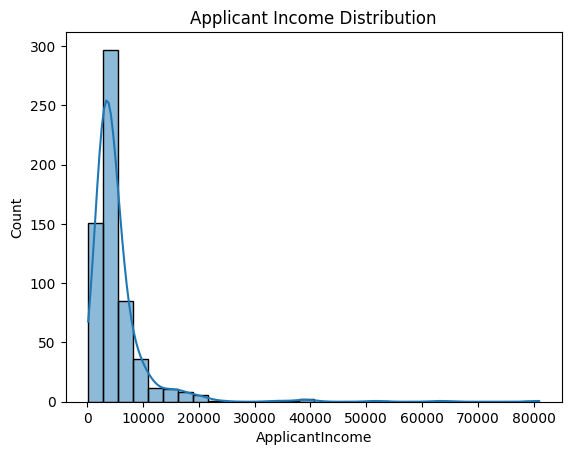

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [15]:
import seaborn as sns

sns.histplot(bank['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

print(bank['ApplicantIncome'].describe())

In [16]:
bank['IncomeGroup'] = pd.qcut(bank['ApplicantIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_Missing,IncomeGroup
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,Very High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,Medium
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,Very High


In [17]:
bank["Credit_History"].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [18]:
bank["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

/tmp/ipykernel_12186/3684203780.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = bank.groupby('IncomeGroup')['Loan_Status'].value_counts(normalize=True).unstack()


Loan_Status         N         Y
IncomeGroup                    
Low          0.311688  0.688312
Medium       0.313725  0.686275
High         0.307190  0.692810
Very High    0.318182  0.681818


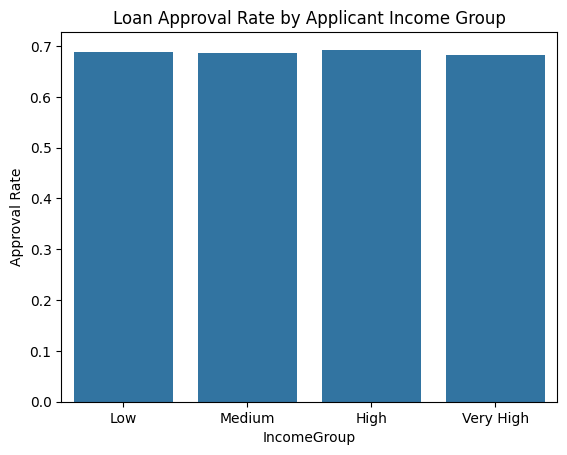

In [19]:
income_analysis = bank.groupby('IncomeGroup')['Loan_Status'].value_counts(normalize=True).unstack()
print(income_analysis)

sns.barplot(x='IncomeGroup', y='Y', data=income_analysis.reset_index())
plt.title("Loan Approval Rate by Applicant Income Group")
plt.ylabel("Approval Rate")
plt.show()


In [20]:
bank["Married"].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [21]:
married_analysis = bank.groupby('Married')['Loan_Status'].value_counts(normalize=True).unstack()
print(married_analysis)

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.281796  0.718204


In [22]:
marries_children_analysis = bank.groupby(['Married', 'Dependents'])['Loan_Status'].value_counts(normalize=True).unstack()
print(marries_children_analysis)

Loan_Status                N         Y
Married Dependents                    
No      0           0.360000  0.640000
        1           0.434783  0.565217
        2           0.375000  0.625000
        3+          0.428571  0.571429
Yes     0           0.270270  0.729730
        1           0.329114  0.670886
        2           0.236559  0.763441
        3+          0.340909  0.659091


In [23]:
history_analysis = bank.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
print(history_analysis)

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.209524  0.790476


In [24]:
gender_analysis = bank.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
print(gender_analysis)

education_analysis = bank.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()
print(education_analysis)


Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


In [25]:
property_analysis = bank.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()
print(property_analysis)


Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


In [26]:
self_emp_analysis = bank.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()
print(self_emp_analysis)


Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Unknown        0.281250  0.718750
Yes            0.317073  0.682927


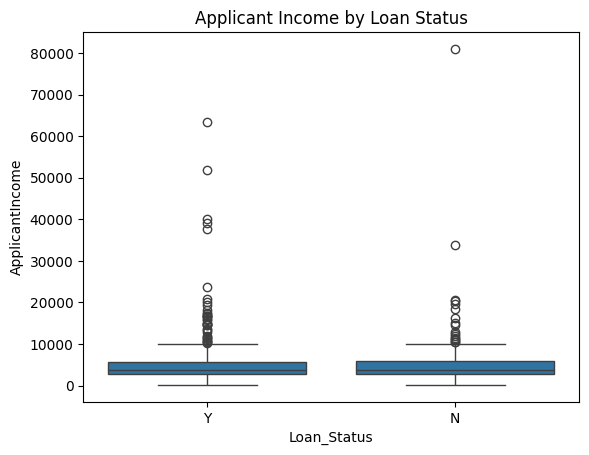

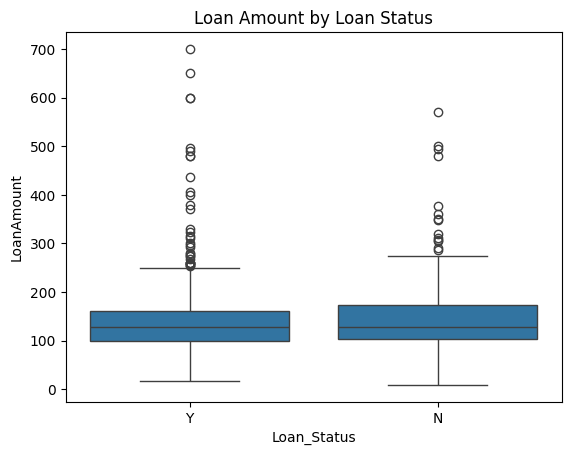

In [27]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=bank)
plt.title('Applicant Income by Loan Status')
plt.show()

sns.boxplot(x='Loan_Status', y='LoanAmount', data=bank)
plt.title('Loan Amount by Loan Status')
plt.show()


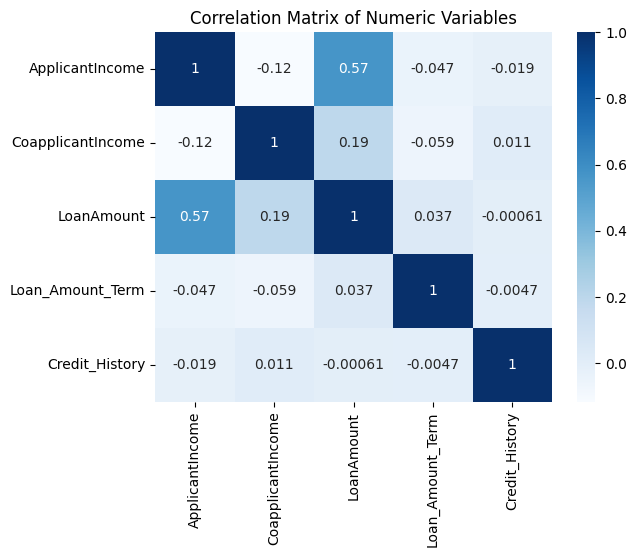

In [28]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
corr = bank[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder
#convert categorical to numerical
le = LabelEncoder()

bank['Gender'] = le.fit_transform(bank['Gender'])
bank['Married'] = le.fit_transform(bank['Married'])
bank['Education'] = le.fit_transform(bank['Education'])
bank['Self_Employed'] = le.fit_transform(bank['Self_Employed'])
bank['Property_Area'] = le.fit_transform(bank['Property_Area'])
bank['Dependents'] = le.fit_transform(bank['Dependents'])
bank['Loan_Status'] = le.fit_transform(bank['Loan_Status']) 


In [30]:

X = bank.drop(columns=['Loan_ID', 'Loan_Status'],axis=1)
y = bank['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X = bank.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = bank['Loan_Status']

X = X.select_dtypes(include=['number'])

print("Non-numeric columns left:", X.select_dtypes(exclude=['number']).columns.tolist())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Non-numeric columns left: []


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


lr = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression ")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression 
Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.81      0.49      0.61        43
           1       0.77      0.94      0.85        80

    accuracy                           0.78       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.78      0.76       123



In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [36]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {acc_lr:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")


Model Comparison:
Logistic Regression Accuracy: 0.780
Random Forest Accuracy: 0.772


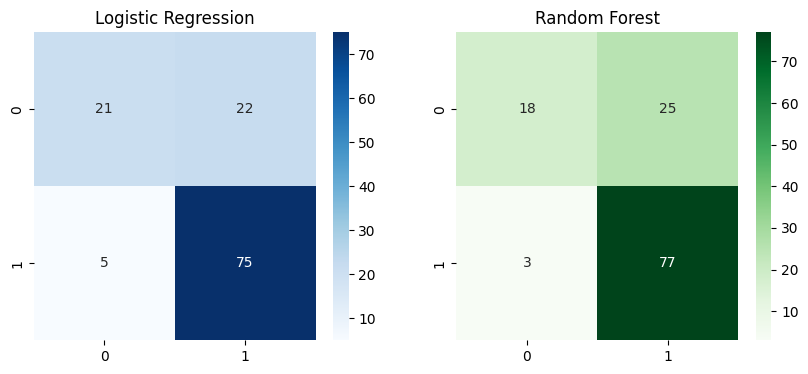

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest')

plt.show()

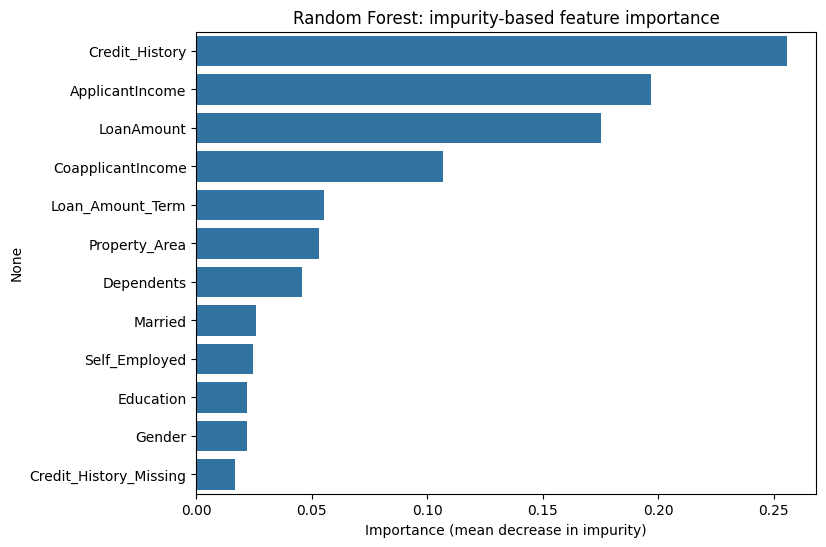

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Random Forest: impurity-based feature importance')
plt.xlabel('Importance (mean decrease in impurity)')
plt.show()


In [41]:
import numpy as np
coefs = pd.Series(lr.coef_[0], index=X_train.columns).sort_values(ascending=False)
odds_ratios = np.exp(coefs) 

print(coefs.head())
print('\nOdds ratios:\n\n', odds_ratios.head())


Credit_History    1.314193
Married           0.343288
Dependents        0.116055
Property_Area     0.091663
Self_Employed     0.054544
dtype: float64

Odds ratios:

 Credit_History    3.721748
Married           1.409575
Dependents        1.123057
Property_Area     1.095995
Self_Employed     1.056059
dtype: float64
